In [57]:
import random
import matplotlib.pyplot as plt

created the algorithm base on the info i found on https://en.wikipedia.org/wiki/Maze_generation_algorithm

In [58]:
#dx dy
directions = [(0,1),(0,-1),(1,0),(-1,0)]

def plot_maze(maze, path=None):
    height = maze["height"]
    width = maze["width"]
    for i in range(height):
        for j in range(width):
            cell = maze["state"][i][j]
            x = j
            y = height - 1 - i  
            if cell["walls"][3]:  
                plt.plot([x, x+1], [y+1, y+1], color="black")
            if cell["walls"][2]:  
                plt.plot([x, x+1], [y, y], color="black")
            if cell["walls"][0]:  
                plt.plot([x+1, x+1], [y, y+1], color="black")
            if cell["walls"][1]:  
                plt.plot([x, x], [y, y+1], color="black")
    plt.axis("equal")
    plt.axis("off")
    if path:
        for (x, y) in path:
            plt.plot(y + 0.5, height - 1 - x + 0.5, marker='o', color='red', markersize=10)
    plt.show()

In [59]:
def initial_maze(width=10,height=10):
    return {
        "state":[[ {"visited":False ,"walls":[True]*4 } for _ in range(width) ] for _ in range(height)] ,
        "width":width,
        "height":height
            }

def get_neighbors(x,y,maze):
    can_visit = []
    for di in directions :
        dx,dy = di
        if  0 <= x + dx < maze["height"] and 0 <= y + dy < maze["width"] : 
            if maze["state"][x + dx][y + dy]["visited"] is False :
                can_visit.append((x+dx,y+dy))
    return  can_visit

def new_walls(current_cell,x,y,adj_x,adj_y):
    walls = current_cell["walls"]
    if x == adj_x and y < adj_y :   #right
        walls[0] = False
    if x == adj_x and y > adj_y :   #left
        walls[1] = False
    if x < adj_x and y == adj_y :   #down
        walls[2] = False
    if x > adj_x and y == adj_y :   #up
        walls[3] = False
    return walls


[(0, 1), (1, 0)]


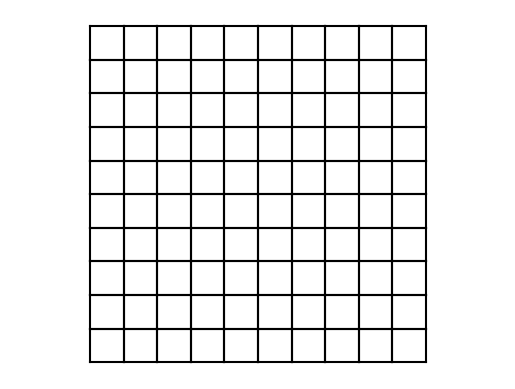

In [60]:
grid = initial_maze()
nei = get_neighbors(0,0,grid)
print(nei)
plot_maze(grid)

In [61]:
def generate_maze(height=10,width=10,start=(0,0)):

    maze = initial_maze(height,width)

    stack = [start]

    while stack :
        current = stack.pop(-1)
        x , y = current
        maze["state"][x][y]["visited"] = True
        adjs = get_neighbors(x,y,maze)
        if adjs :
            adj = random.choice(adjs)
            adj_x,adj_y = adj
            maze["state"][x][y]["walls"] = new_walls(maze["state"][x][y],x,y,adj_x,adj_y)
            maze["state"][adj_x][adj_y]["walls"] = new_walls(maze["state"][adj_x][adj_y],adj_x,adj_y,x,y)
            stack.append((x, y))
            stack.append((adj_x,adj_y))

    return maze

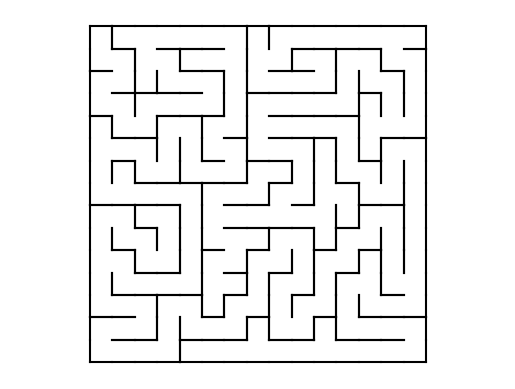

In [62]:
maze = generate_maze(15,15)
plot_maze(maze)

In [63]:
def get_reachable_neighbours(maze,cred):
    directions = [(0,1),(0,-1),(1,0),(-1,0)] #right left down up
    i , j = cred
    can_visit = []
    for idx , val in enumerate(maze["state"][i][j]["walls"]) :
        if val is False :
            x , y = directions[idx]
            can_visit.append((x+i,y+j))
    return  can_visit

print(maze["state"][2][0]["walls"])
print(get_reachable_neighbours(maze,(2,0)))


[False, True, False, True]
[(2, 1), (3, 0)]


In [64]:
def bfs_agent(maze, start, end):
    visited = set()
    queue = [[start]]  
    
    while queue:
        path = queue.pop(0)
        node = path[-1]
        
        if node not in visited:
            visited.add(node)
            
            if node == end:
                return path 
            
            neighbours = get_reachable_neighbours(maze,node)
            for neighbour in neighbours:
                if neighbour not in visited:
                    new_path = list(path)
                    new_path.append(neighbour)
                    queue.append(new_path)
    
    return None

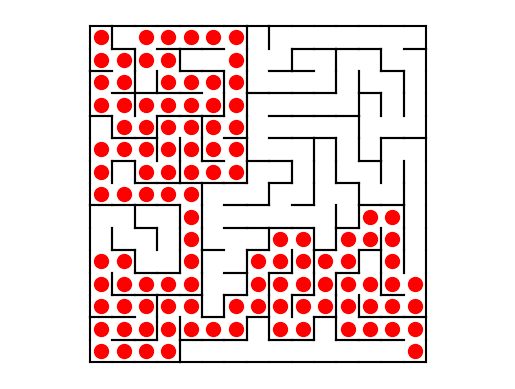

In [65]:
start = (0, 0)
end = (14, 14)

path = bfs_agent(maze, start, end)

plot_maze(maze, path)

In [66]:
def dfs_agent(maze, start, end):
    visited = set()
    stack = [[start]]  
    
    while stack:
        path = stack.pop()
        node = path[-1]
        
        if node not in visited:
            visited.add(node)
            
            if node == end:
                return path 
            
            neighbours = get_reachable_neighbours(maze,node)
            for neighbour in neighbours:
                if neighbour not in visited:
                    new_path = list(path)
                    new_path.append(neighbour)
                    stack.append(new_path)
    
    return None



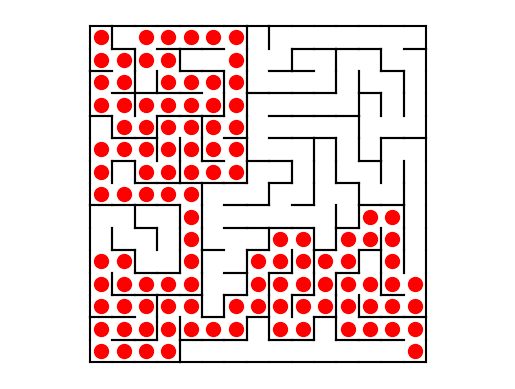

In [67]:
path = dfs_agent(maze, start, end)

plot_maze(maze, path)

In [68]:
import math
import heapq #this is so usefull for the priority queue

#there is no need for this , i realised later why we use the manhattan in mazes but i am keeping it anyways
def euclidian_distance_heuristic(a,b): 
    return math.sqrt((b[0] - a[0])**2 + (b[1] - a[1])**2 )


def manhattan_distance_heuristic(a,b):
    return  abs(b[0] - a[0]) + abs(b[1] - a[1])


def a_star_agent(maze, start, end , heuristic):
    """
    just a rq , since i used dfs for creating the maze , we get at the end a perfect maze that have only
    one path to the result , but i may add in the future an other generating algorithm that gets multiple paths
    to the soltion , so i ll allow the a star agent to re visit the same node if he needs to
    """
    # a node = (f, (x,y), path)
    open_set = [] #nodes that the agent might visit and ther cost and path
    closed_set = {} #a hash nodes already visited and ther cost

    heapq.heappush(open_set,(0,start,[start]))
    closed_set[start] = 0

    while open_set :
        f , current , path = heapq.heappop(open_set)

        if current == end :
            return path

        if current in closed_set and closed_set[current] < f :
            continue

        if (current in closed_set and closed_set[current] > f) or current not in closed_set :
            closed_set[current] = f

        for neighbor in get_reachable_neighbours(maze , current) :
            g = len(path)
            h = heuristic(neighbor,end)
            f = h + g
            heapq.heappush(open_set,(f,neighbor,path + [neighbor]))

    return None

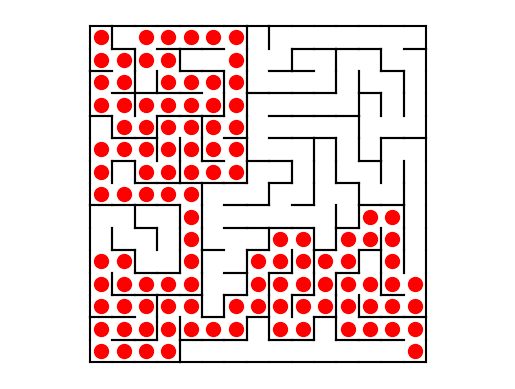

In [69]:
path = a_star_agent(maze, start, end, manhattan_distance_heuristic)

plot_maze(maze, path)